In [227]:
application = 'Watercare'

In [228]:
%matplotlib inline

In [229]:
import pathlib

In [230]:
from matplotlib import pyplot as plt 

In [231]:
import pandas as pd

In [232]:
import numpy as np

In [233]:
HOME = pathlib.Path.home()

In [234]:
varname = 'RAIN_BC'
stat = 'mean'

In [235]:
dpath = HOME.joinpath(f"research/Smart_Ideas/outputs/targets/application_cases/{application}/{varname}")

In [236]:
lfiles = list(dpath.glob("*.csv"))

In [237]:
lfiles

[PosixPath('/home/nicolasf/research/Smart_Ideas/outputs/targets/application_cases/Watercare/RAIN_BC/daily_max_RAIN_BC.csv'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/outputs/targets/application_cases/Watercare/RAIN_BC/daily_mean_RAIN_BC.csv'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/outputs/targets/application_cases/Watercare/RAIN_BC/daily_sum_RAIN_BC.csv'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/outputs/targets/application_cases/Watercare/RAIN_BC/daily_min_RAIN_BC.csv')]

In [238]:
data = pd.read_csv(dpath.joinpath(f"daily_{stat}_{varname}.csv"), index_col=0, parse_dates=True)

<AxesSubplot:xlabel='time'>

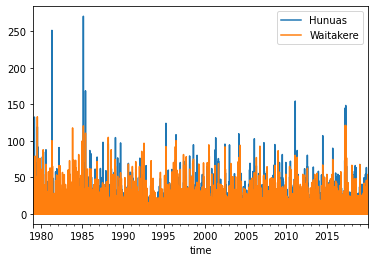

In [239]:
data.plot()

In [240]:
data.head()

,Hunuas,Waitakere
time,,
1979-01-01,0.000,0.000000
1979-01-02,0.000,0.000000
1979-01-03,2.725,3.033333
1979-01-04,0.000,0.000000
1979-01-05,0.000,0.000000


### threshold in mm 

In [241]:
thresh = 60

### keep all the instances where values exceed thresholds, the other are set to `np.NaN`

In [242]:
df = data.where((data >= thresh))

### set all instances that are non-null to 1

In [193]:
df = df.where(df.isnull(), 1)

### number of days per month above the threshold

In [194]:
df_m = df.resample('1M').sum()

In [195]:
df_m

,Hunuas,Waitakere
time,,
1979-01-31,0.0,0.0
1979-02-28,1.0,0.0
1979-03-31,0.0,1.0
1979-04-30,1.0,0.0
1979-05-31,0.0,0.0
...,...,...
2019-08-31,0.0,0.0
2019-09-30,0.0,0.0
2019-10-31,1.0,0.0


### adds the number of days in month, in case we want to calculate the proportion 

In [196]:
df_m.loc[:,'ndays'] = df_m.index.days_in_month 

In [197]:
df_m

,Hunuas,Waitakere,ndays
time,,,
1979-01-31,0.0,0.0,31
1979-02-28,1.0,0.0,28
1979-03-31,0.0,1.0,31
1979-04-30,1.0,0.0,30
1979-05-31,0.0,0.0,31
...,...,...,...
2019-08-31,0.0,0.0,31
2019-09-30,0.0,0.0,30
2019-10-31,1.0,0.0,31


### 3 months rolling accumulation 

In [198]:
df_s = df_m.rolling(window=3, min_periods=3).sum()

In [199]:
df_s.head()

,Hunuas,Waitakere,ndays
time,,,
1979-01-31,NaN,NaN,NaN
1979-02-28,NaN,NaN,NaN
1979-03-31,1.0,1.0,90.0
1979-04-30,2.0,1.0,89.0
1979-05-31,1.0,1.0,92.0


### plots the distribution of the number of days exceeding threshold

In [200]:
import seaborn as sns

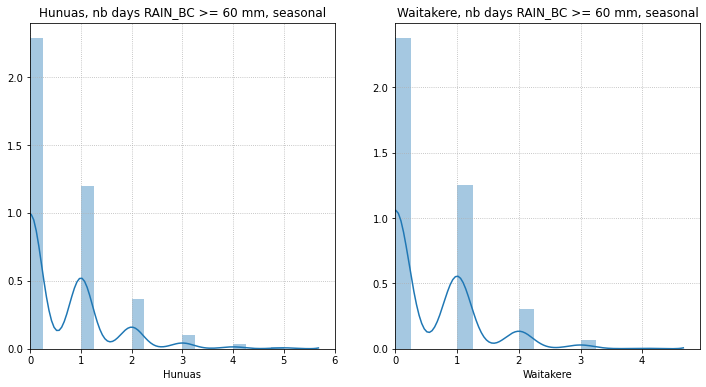

In [201]:
f, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.distplot(df_s.Hunuas, ax=axes[0])
axes[0].set_title(f'Hunuas, nb days {varname} >= {thresh} mm, seasonal')
sns.distplot(df_s.Waitakere, ax=axes[1])
axes[1].set_title(f'Waitakere, nb days {varname} >= {thresh} mm, seasonal')
[ax.grid(ls=':') for ax in axes]
[ax.set_xlim([0, None]) for ax in axes]
f.savefig(f'../distribution_Hunuas_Waitakere_nbdays_over_{thresh}mm_seasonal.png', dpi=200, bbox_inches='tight')

### saves to disk 

In [202]:
df_s.to_csv(f'../outputs/seasonal_{varname}_nbdays_over_{thresh}mm.csv')

<AxesSubplot:xlabel='time'>

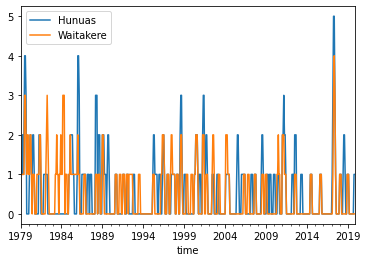

In [203]:
df_s.iloc[:,:-1].plot()

In [204]:
# df_s = df_s.assign(Hunuas_prop = df_s.Hunuas / df_s.ndays)
# df_s = df_s.assign(Waitakere_prop = df_s.Waitakere / df_s.ndays)

In [205]:
from calendar import month_abbr

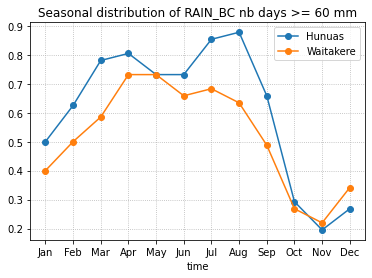

In [206]:
f, ax = plt.subplots()
df_s.groupby(df_s.index.month).mean().iloc[:,:-1].plot(ax=ax, marker='o')
ax.grid(ls=':')
ax.set_xticks(np.arange(1,12+1))
ax.set_xticklabels(month_abbr[1:]); 
ax.set_title(f"Seasonal distribution of {varname} nb days >= {thresh} mm")
f.savefig(f'../figures/seasonal_distribution_{varname}_over_{thresh}mm.png', dpi=200, bbox_inches='tight')

-----

### dry days 

### threshold in mm 

In [243]:
thresh = 0.1

### keep all the instances where values exceed thresholds, the other are set to `np.NaN`

In [244]:
df = data.where((data < thresh))

### set all instances that are non-null to 1

In [246]:
df = df.where(df.isnull(), 1)

### number of days per month above the threshold

In [247]:
df_m = df.resample('1M').sum()

In [248]:
df_m

,Hunuas,Waitakere
time,,
1979-01-31,28.0,25.0
1979-02-28,14.0,10.0
1979-03-31,16.0,16.0
1979-04-30,17.0,16.0
1979-05-31,17.0,17.0
...,...,...
2019-08-31,7.0,5.0
2019-09-30,13.0,14.0
2019-10-31,16.0,15.0


### adds the number of days in month, in case we want to calculate the proportion 

In [249]:
df_m.loc[:,'ndays'] = df_m.index.days_in_month 

In [250]:
df_m

,Hunuas,Waitakere,ndays
time,,,
1979-01-31,28.0,25.0,31
1979-02-28,14.0,10.0,28
1979-03-31,16.0,16.0,31
1979-04-30,17.0,16.0,30
1979-05-31,17.0,17.0,31
...,...,...,...
2019-08-31,7.0,5.0,31
2019-09-30,13.0,14.0,30
2019-10-31,16.0,15.0,31


### 3 months rolling accumulation 

In [251]:
df_s = df_m.rolling(window=3, min_periods=3).sum()

In [252]:
df_s.head()

,Hunuas,Waitakere,ndays
time,,,
1979-01-31,NaN,NaN,NaN
1979-02-28,NaN,NaN,NaN
1979-03-31,58.0,51.0,90.0
1979-04-30,47.0,42.0,89.0
1979-05-31,50.0,49.0,92.0


### plots the distribution of the number of days exceeding threshold

In [253]:
import seaborn as sns

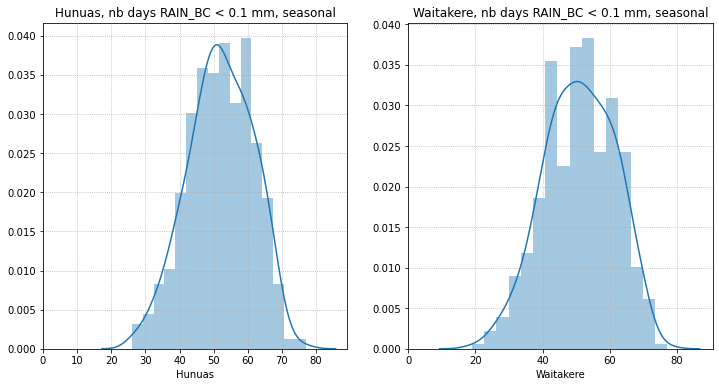

In [254]:
f, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.distplot(df_s.Hunuas, ax=axes[0])
axes[0].set_title(f'Hunuas, nb days {varname} < {thresh} mm, seasonal')
sns.distplot(df_s.Waitakere, ax=axes[1])
axes[1].set_title(f'Waitakere, nb days {varname} < {thresh} mm, seasonal')
[ax.grid(ls=':') for ax in axes]
[ax.set_xlim([0, None]) for ax in axes]
f.savefig(f'../distribution_Hunuas_Waitakere_nbdays_below_{thresh}mm_seasonal.png', dpi=200, bbox_inches='tight')

### saves to disk 

In [255]:
df_s.to_csv(f'../outputs/seasonal_{varname}_nbdays_below_{thresh}mm.csv')

<AxesSubplot:xlabel='time'>

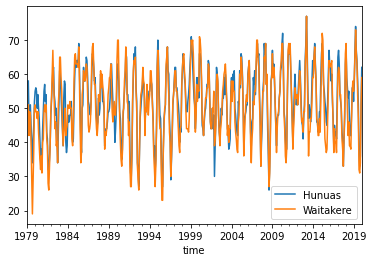

In [256]:
df_s.iloc[:,:-1].plot()

In [257]:
# df_s = df_s.assign(Hunuas_prop = df_s.Hunuas / df_s.ndays)
# df_s = df_s.assign(Waitakere_prop = df_s.Waitakere / df_s.ndays)

In [205]:
from calendar import month_abbr

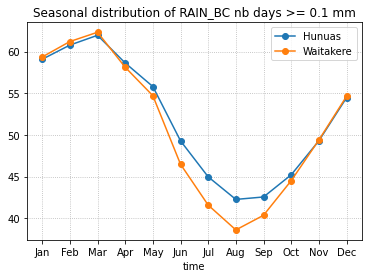

In [258]:
f, ax = plt.subplots()
df_s.groupby(df_s.index.month).mean().iloc[:,:-1].plot(ax=ax, marker='o')
ax.grid(ls=':')
ax.set_xticks(np.arange(1,12+1))
ax.set_xticklabels(month_abbr[1:]); 
ax.set_title(f"Seasonal distribution of {varname} nb days >= {thresh} mm")
f.savefig(f'../figures/seasonal_distribution_{varname}_below_{thresh}mm.png', dpi=200, bbox_inches='tight')

### calculates the proportion 

In [259]:
df_s = df_s.assign(Hunuas_prop = df_s.Hunuas / df_s.ndays)
df_s = df_s.assign(Waitakere_prop = df_s.Waitakere / df_s.ndays) 

In [260]:
df_s

,Hunuas,Waitakere,ndays,Hunuas_prop,Waitakere_prop
time,,,,,
1979-01-31,NaN,NaN,NaN,NaN,NaN
1979-02-28,NaN,NaN,NaN,NaN,NaN
1979-03-31,58.0,51.0,90.0,0.644444,0.566667
1979-04-30,47.0,42.0,89.0,0.528090,0.471910
1979-05-31,50.0,49.0,92.0,0.543478,0.532609
...,...,...,...,...,...
2019-08-31,37.0,32.0,92.0,0.402174,0.347826
2019-09-30,33.0,31.0,92.0,0.358696,0.336957
2019-10-31,36.0,34.0,92.0,0.391304,0.369565


### demean 

In [261]:
def demean(x):
    z = x - x.loc['1981':'2010',:].mean()
    return z 

In [264]:
df_s_anomalies = df_s.groupby(df_s.index.month).apply(demean)

<AxesSubplot:xlabel='time'>

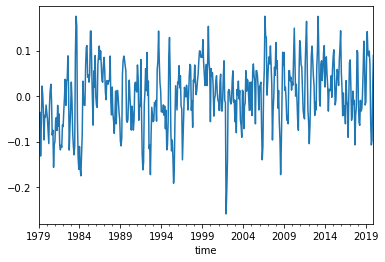

In [267]:
df_s_anomalies.Hunuas_prop.plot()

In [268]:
df_s

,Hunuas,Waitakere,ndays,Hunuas_prop,Waitakere_prop
time,,,,,
1979-01-31,NaN,NaN,NaN,NaN,NaN
1979-02-28,NaN,NaN,NaN,NaN,NaN
1979-03-31,58.0,51.0,90.0,0.644444,0.566667
1979-04-30,47.0,42.0,89.0,0.528090,0.471910
1979-05-31,50.0,49.0,92.0,0.543478,0.532609
...,...,...,...,...,...
2019-08-31,37.0,32.0,92.0,0.402174,0.347826
2019-09-30,33.0,31.0,92.0,0.358696,0.336957
2019-10-31,36.0,34.0,92.0,0.391304,0.369565


In [269]:
df_s_anomalies

,Hunuas,Waitakere,ndays,Hunuas_prop,Waitakere_prop
time,,,,,
1979-01-31,NaN,NaN,NaN,NaN,NaN
1979-02-28,NaN,NaN,NaN,NaN,NaN
1979-03-31,-3.400000,-11.400000,-0.233333,-0.036032,-0.124884
1979-04-30,-11.866667,-16.833333,-0.233333,-0.131635,-0.187428
1979-05-31,-5.866667,-6.100000,0.000000,-0.063768,-0.066304
...,...,...,...,...,...
2019-08-31,-4.866667,-6.466667,0.000000,-0.052899,-0.070290
2019-09-30,-9.866667,-10.066667,0.000000,-0.107246,-0.109420
2019-10-31,-8.900000,-11.033333,0.000000,-0.096739,-0.119928
